# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [74]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

Import project files

In [ ]:
#import sys
#sys.path.append("utils")
# from utils import models

In [ ]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

Uploading data

In [ ]:
train_file = 'data/df_filtered_1000.csv'
output_name = '1000_example.csv'

Getting dataframe

In [ ]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 0 ns
Wall time: 21 ms


## 1+2) Lemmatizing and protecting stopwords

Defininig the protected word list

In [87]:
wide_stop_words = False
if wide_stop_words:
    nlp_utils.add_word_list_to_stop_words('data/1000_most_common_words.txt')
else:
    nlp_utils.stopword_list = nlp_utils.stopwords.words('english')
print('Number of protected words:', len(nlp_utils.stopword_list))
print(nlp_utils.stopword_list[:10])

Number of protected words: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


Defining the word dictionary

In [ ]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 25.3 s
Wall time: 30.7 s


In [ ]:
print('Number of different words:', len(word_dict))

Number of different words: 3281


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Embedding the word list

In [ ]:
embedded_dict = cluster_utils.embed_corpus(word_list)

Clustering

eps 1.7651676497117053
CPU times: total: 1.14 s
Wall time: 1.13 s


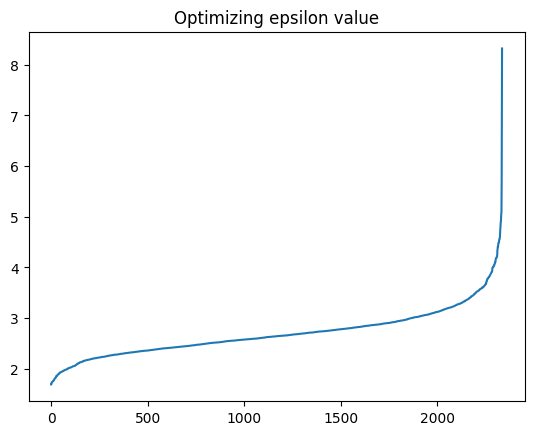

In [ ]:
%%time

cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [ ]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

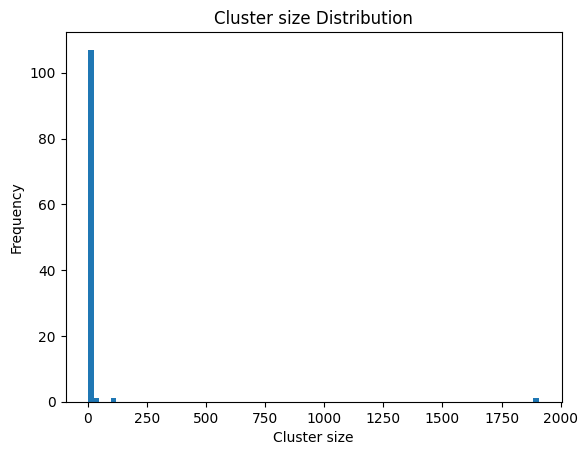

In [ ]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

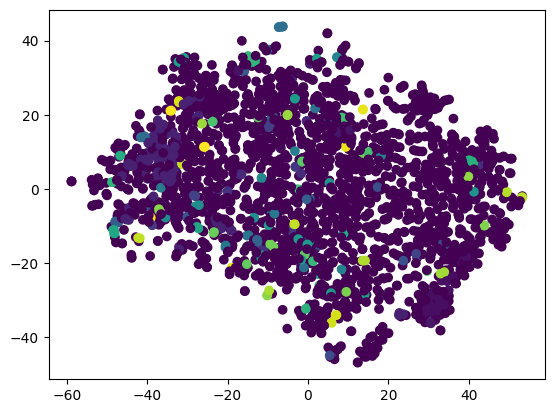

CPU times: total: 1min 5s
Wall time: 26.5 s


In [ ]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.053744078


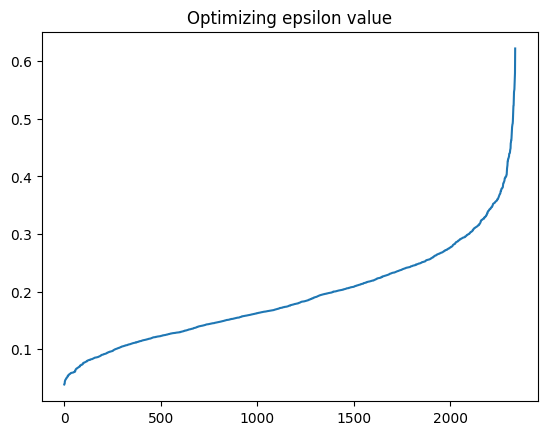

In [ ]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

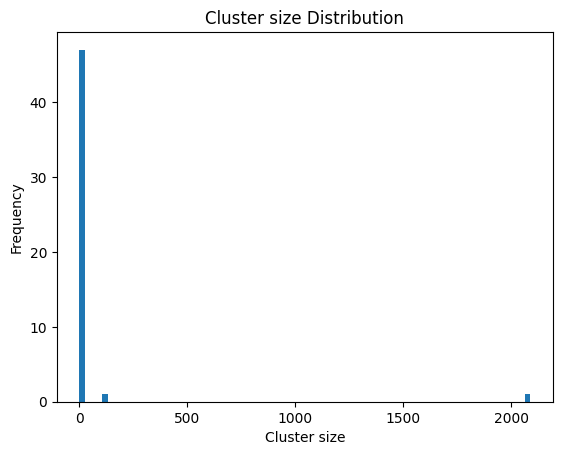

In [ ]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

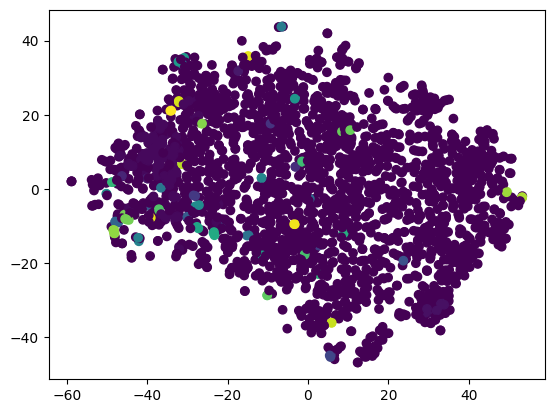

CPU times: total: 1min 8s
Wall time: 25.7 s


In [ ]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [ ]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

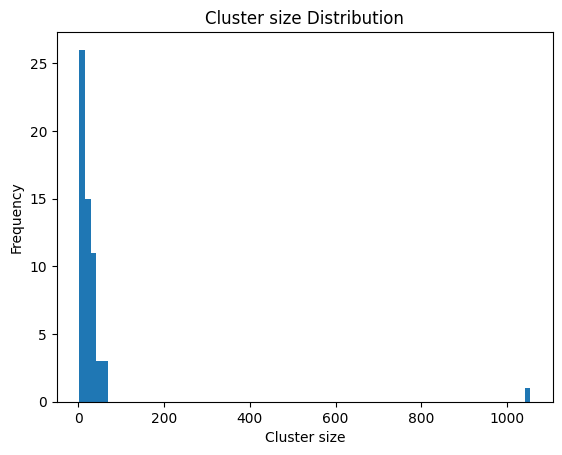

In [ ]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

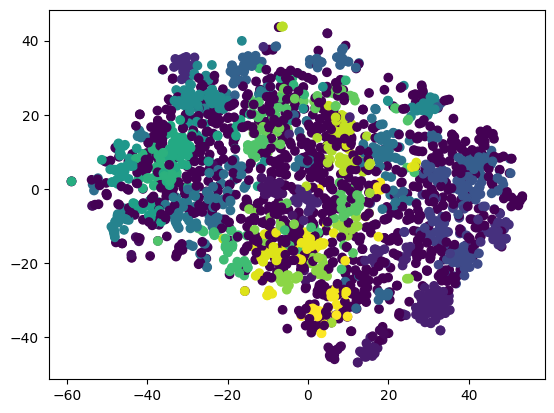

In [ ]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [ ]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 110 clusters
Cosine distance:	 49 clusters
HDBSCAN clustering:	 59 clusters


Plotting Jaccard index histogram

In [ ]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['chocolate', 'hi', 'banana', 'love', 'cola']

Getting distance threshold

In [ ]:
threshold = cluster_utils.define_max_threshold()
threshold

sim_list_best 0.82521856
sim_list_worst 0.56748897


0.3036462366580963

### 3.2) Replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [ ]:
######################### TEMP #######################
#df = df[:30]

Starting average Jaccard index: 0.18490998931057948
Distance threshold: 0.3036462366580963
distance: 0.24770902 	replacing ['soon', 'third', 'another', 'first', 'second', 'year', 'every', 'last', 'next', 'whole'] in this
distance: 0.13158196 	replacing ['stevie', 'wayne'] in ross
distance: 0.13050231 	replacing ['action', 'battle'] in challenge
distance: 0.2931047 	replacing ['tony', 'phillip', 'sylvia', 'sherry', 'turner', 'keith', 'lightfoot', 'johnson', 'james', 'quigley', 'thomas', 'mark', 'michael', 'robert', 'chandler', 'paxton', 'scarlett', 'rebecca', 'browne', 'elizabeth', 'kelly', 'joseph', 'miller', 'ray', 'paul', 'meyer', 'clark', 'shirley', 'gilbert', 'carter', 'joe', 'kerouac', 'henry', 'christine', 'peggy', 'cornwell', 'mason', 'boyer', 'dane', 'mrs', 'duncan', 'smith', 'john'] in collins
distance: 0.17075366 	replacing ['awful', 'crap', 'ridiculous'] in worse
distance: 0.22881295 	replacing ['customer', 'application', 'client', 'management', 'development'] in services
di

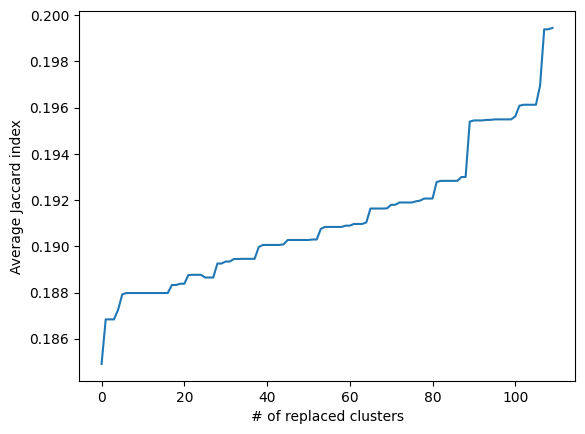

In [ ]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [ ]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",0,6,11,5
1,461,just awful: this was possibly the worst book i...,0,25,just worse : this was possibly the bad book i ...,(just) [worse] (this) (was) possibly (the) {ba...,1,3,14,7
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most pred...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,0,4,10,7
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size run really small , it bag up e...","pass: (the) {size} run really small, (it) {fli...",0,5,11,9
...,...,...,...,...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct secret ....,excellent: prompt delivery. correct {part} (yo...,1,5,9,9
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....,0,4,11,10
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...,0,2,13,13
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i new it . ...,video purchase: like (the) movie (so) (i) {buy...,1,2,7,8


#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.18490998931057948
Distance threshold: 0.3036462366580963
distance: 0.32705247 the next cluster is too wide and wont be replaced: ['soon', 'today', 'trust', 'unless', 'rather', 'four', 'mind', 'bring', 'except', 'speak', 'much', 'two', 'tell', 'able', 'never', 'remind', 'still', 'look', 'almost', 'matter', 'know', 'understand', 'however', 'talk', 'anyone', 'already', 'seriously', 'anyway', 'many', 'remember', 'let', 'day', 'unfortunately', 'else', 'like', 'three', 'exactly', 'definitely', 'might', 'stupid', 'life', 'perhaps', 'make', 'although', 'something', 'could', 'summer', 'expect', 'really', 'call', 'way', 'another', 'thing', 'otherwise', 'first', 'explain', 'absolutely', 'though', 'damn', 'enough', 'either', 'lot', 'crazy', 'second', 'maybe', 'year', 'sure', 'think', 'apparently', 'hear', 'totally', 'dude', 'mean', 'get', 'anymore', 'say', 'pretty', 'anything', 'certainly', 'right', 'try', 'find', 'probably', 'actually', 'wonder', 'finally', 'see'

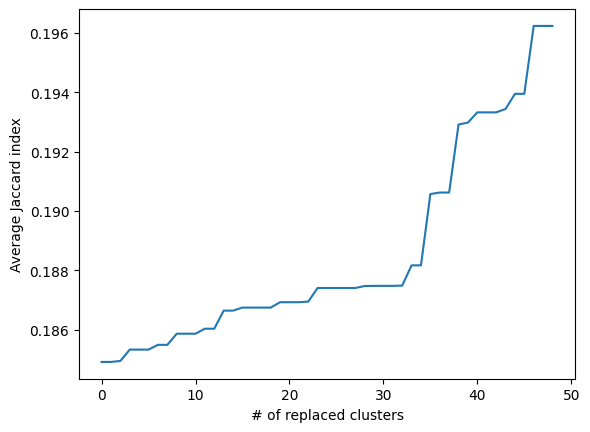

In [ ]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [ ]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",0,6,11,5
1,461,just awful: this was possibly the worst book i...,0,25,just crap : this was possibly the bad book i h...,(just) [crap] (this) (was) possibly (the) {bad...,1,3,14,7
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most disa...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,0,4,10,7
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size down really small , it flip up...","pass: (the) {size} [down] really small, (it) {...",1,5,11,8
...,...,...,...,...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct part . y...,excellent: prompt delivery. correct {part} (yo...,1,5,9,9
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....,0,4,11,10
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...,0,2,13,13
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i new it . ...,video purchase: like (the) movie (so) (i) {buy...,1,2,7,8


#### 3.2.3) Based on HDBSCAN clustering

Starting average Jaccard index: 0.18490998931057948
Distance threshold: 0.3036462366580963
distance: 0.36643526 the next cluster is too wide and wont be replaced: ['weak', 'ok', 'yeah', 'sorry', 'soo', 'funny', 'nothin', 'stupid', 'hahaha', 'yea', 'suck', 'huh', 'damn', 'crazy', 'wow', 'dude', 'creepy', 'kinda', 'scary', 'wtf', 'joke', 'chill', 'hahahaha', 'bet', 'swear', 'yes', 'meh', 'weird', 'freakin', 'bad', 'annoying', 'hell', 'okay', 'dumb', 'fool']
distance: 0.36183655 the next cluster is too wide and wont be replaced: ['simply', 'annoy', 'quicker', 'satisfied', 'irritate', 'sincerely', 'warn', 'beyond', 'expose', 'likely', 'however', 'normally', 'quite', 'suggest', 'disappoint', 'beware', 'clarify', 'therefore', 'unfortunately', 'disturb', 'perhaps', 'although', 'comfortable', 'truly', 'easily', 'otherwise', 'intend', 'hesitate', 'properly', 'accomplish', 'aware', 'seem', 'difficult', 'involve', 'advise', 'pronounce', 'certainly', 'entertain', 'distract', 'usually', 'personally

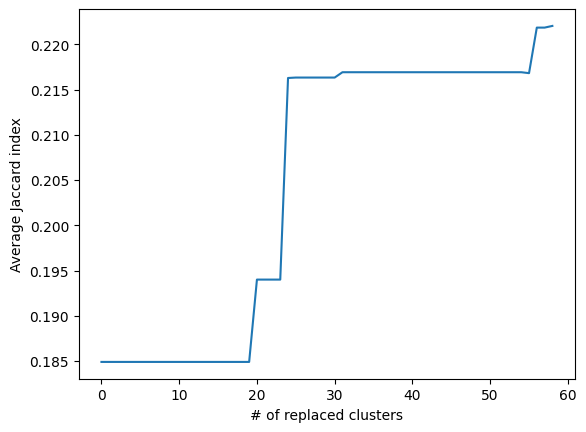

In [ ]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

In [ ]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",0,6,11,5
1,461,just awful: this was possibly the worst book i...,0,25,just awful : this was possibly the bad book i ...,(just) [crap] (this) (was) possibly (the) {bad...,1,3,14,7
2,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most disa...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,0,4,10,7
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size run really small , it flip up ...","pass: (the) {size} [down] really small, (it) {...",1,5,11,8
...,...,...,...,...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct part . y...,excellent: prompt delivery. correct {part} (yo...,1,5,9,9
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....,1,4,11,9
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...,0,2,13,13
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i buy it . ...,video purchase: like (the) movie (so) (i) {buy...,1,2,7,8


Looking at the histogram again

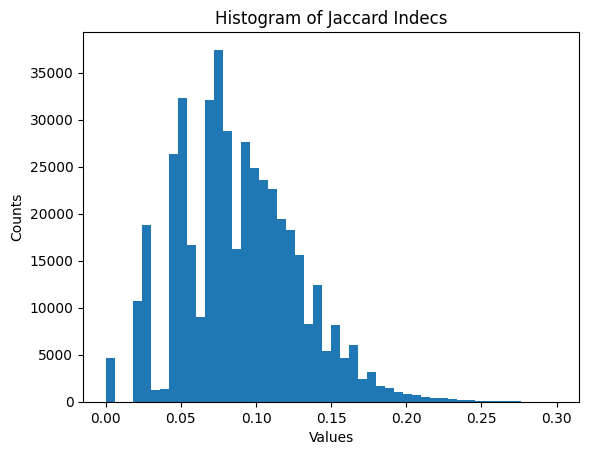

CPU times: total: 7.17 s
Wall time: 7.21 s


In [ ]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

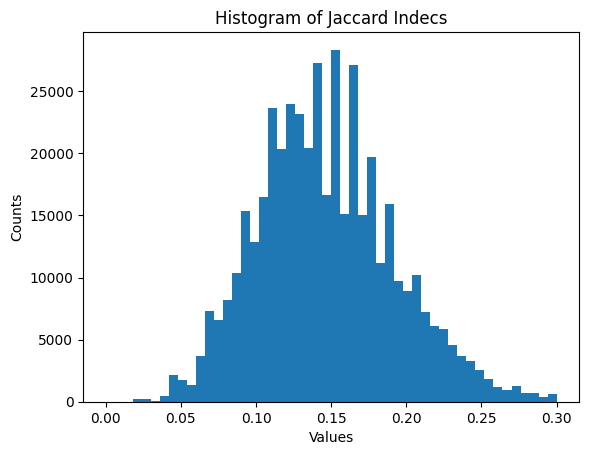

CPU times: total: 7.8 s
Wall time: 7.83 s


In [ ]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

For eucledian distance

In [ ]:
protected, lemma, replaced, all_words = nlp_utils.get_stat(word_dict_2)
print(f'Protected: {protected}\tLemmatized: {lemma}\t Replaced: {replaced}\t All: {all_words}')

Protected: 135	Lemmatized: 970	 Replaced: 386	 All: 3311


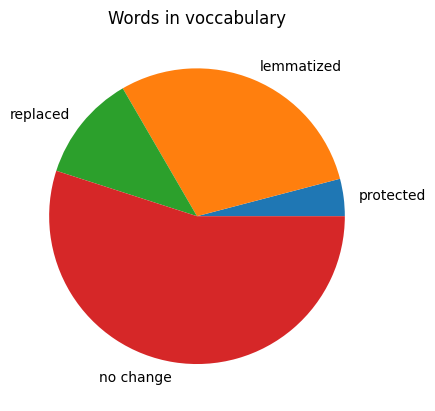

In [ ]:
y = np.array([protected, lemma, replaced, (all_words - protected - lemma - replaced)])
mylabels = ['protected', 'lemmatized', 'replaced', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in voccabulary')
plt.show()

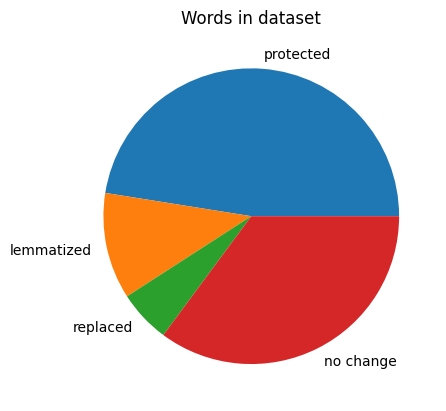

In [ ]:
y = np.array([df_2['num_protected'].sum(), df_2['num_lemmatized'].sum(), df_2['num_replaced'].sum(), df_2['num_no_change'].sum()])
mylabels = ['protected', 'lemmatized', 'replaced', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

In [95]:
print('Overall,', df_2['num_protected'].sum() + df_2['num_lemmatized'].sum() + df_2['num_replaced'].sum() + df_2['num_no_change'].sum(), 'words in the dataset.')

Overall, 22967 words in the dataset.


## 4) Force anonymity

### Get anonymity degree

Before replacement

In [ ]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 944 	number of all documents: 946


After replacement

In [ ]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 944 	number of all documents: 946


### Steps:
1. Finding k nearest neighbors using approximate nearest neighbors
2. Finding the different words between the neighbors
2. Replacing the different words with *

In [ ]:
anonym_utils.delete_uncommon_words(['I love choco', 'I love banana'])


['I love *', 'I love *']

In [ ]:
anonym_utils.force_anonym_using_annoy(['I love choco', 'I love banana', 'lalala'], k=2)

Start: get_anonym_degree: 1
similar_doc_ind [0, 1]
Breaking after moving over 2 of all 3 indexes.
unused_indexes: [2]
End: get_anonym_degree: 1


['I love *', 'I love *', '*']

In [89]:
force_anon_txt_annoy, neighbor_list = anonym_utils.force_anonym_using_annoy(df_2['anon_txt'], k=2)
anonym_utils.get_anonym_degree(force_anon_txt_annoy)

Start: get_anonym_degree: 1
similar_doc_ind [0, 298]
similar_doc_ind [1, 265]
similar_doc_ind [2, 754]
similar_doc_ind [3, 246]
similar_doc_ind [4, 534]
similar_doc_ind [5, 876]
similar_doc_ind [6, 228]
similar_doc_ind [7, 424]
similar_doc_ind [8, 220]
similar_doc_ind [9, 771]
similar_doc_ind [10, 12]
similar_doc_ind [11, 369]
similar_doc_ind [13, 384]
similar_doc_ind [14, 158]
similar_doc_ind [15, 314]
similar_doc_ind [16, 231]
similar_doc_ind [17, 374]
similar_doc_ind [18, 385]
similar_doc_ind [19, 370]
similar_doc_ind [20, 213]
similar_doc_ind [21, 355]
similar_doc_ind [22, 581]
similar_doc_ind [23, 784]
similar_doc_ind [24, 728]
similar_doc_ind [25, 372]
similar_doc_ind [26, 140]
similar_doc_ind [27, 653]
similar_doc_ind [28, 143]
similar_doc_ind [29, 77]
similar_doc_ind [30, 516]
similar_doc_ind [31, 159]
similar_doc_ind [32, 34]
similar_doc_ind [33, 436]
similar_doc_ind [35, 40]
similar_doc_ind [36, 615]
similar_doc_ind [37, 590]
similar_doc_ind [38, 501]
similar_doc_ind [39, 287

(1, [[705], [693], [916], [134], [698], [133], [702]])

In [ ]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(force_anon_txt_annoy)
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 7 	number of all documents: 946


In [90]:
df_2['force_anon_txt'] = force_anon_txt_annoy
df_2 = anonym_utils.add_neighbor_list_to_df(df_2, neighbor_list)
# Counting the number of words and *
df_2['num_of_words_after_forcing'] = df_2['force_anon_txt'].apply(lambda x: len(re.findall(r'\w+', x)))
df_2['num_of_deleting_after_forcing'] = df_2['force_anon_txt'].apply(lambda x: len(re.findall(r'\*', x)))


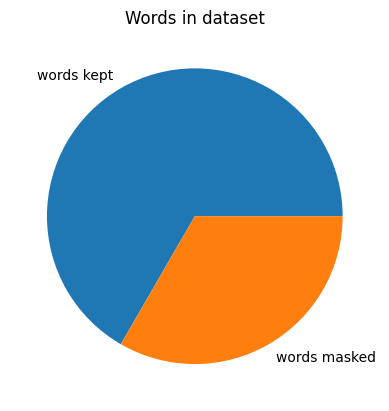

In [91]:
y = np.array([df_2['num_of_words_after_forcing'].sum(), df_2['num_of_deleting_after_forcing'].sum()])
mylabels = ['words kept', 'words masked']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

In [98]:
print('Overall words:')
print(df_2['num_of_words_after_forcing'].sum() + df_2['num_of_deleting_after_forcing'].sum())

Overall words:
23504


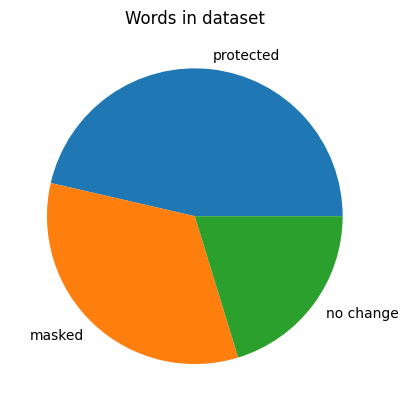

In [ ]:
y = np.array([df_2['num_protected'].sum(), df_2['num_of_deleting_after_forcing'].sum(), (df_2['num_of_words_after_forcing'] - df_2['num_protected']).sum()])
mylabels = ['protected', 'masked', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

In [97]:
print('Overall words:')
print(np.array(df_2['num_protected'].sum() + df_2['num_of_deleting_after_forcing'].sum() + (df_2['num_of_words_after_forcing'] - df_2['num_protected']).sum()))


Overall words:
23504


In [ ]:
i = 1
print(df_2['txt'][i])
print(df_2['anon_txt_history'][i])
print(df_2['force_anon_txt'][i])

just awful: this was possibly the worst book i have ever read. i am amazed by the number of fans for this kind of rubbish.
(just) [worse] (this) (was) possibly (the) {bad} book (i) (have) ever read. (i) (am) {amaze} (by) (the) number (of) {fan} (for) (this) kind (of) rubbish. 
just * : this was * the bad book i have ever read . i am * by the * of * for this * of * .


## 5) Utilization tests

In [ ]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt', 'force_anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change,force_anon_txt,num_of_words_after_forcing,num_of_deleting_after_forcing,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred,force_anon_txt_vader_sentiment_pred
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",0,6,11,5,"* ! : these * are not the "" original "" version...",17,6,0.0000,-0.1957,-0.1957
1,461,just awful: this was possibly the worst book i...,0,25,just worse : this was possibly the bad book i ...,(just) [worse] (this) (was) possibly (the) {ba...,1,3,14,7,just * : this was * the bad book i have ever r...,18,7,-0.5574,-0.2023,-0.5423
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most pred...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7,no lesson * : this is one of * most * * i have...,13,11,-0.5563,-0.0258,-0.2960
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,0,4,10,7,* : i order * to the size * for my * and it wa...,16,6,0.0000,0.0000,0.0000
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size run really small , it bag up e...","pass: (the) {size} run really small, (it) {fli...",0,5,11,9,"* : the size * * * , it bag up * * , they * it...",16,10,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct secret ....,excellent: prompt delivery. correct {part} (yo...,1,5,9,9,excellent : * * . * * . you can not do * with ...,15,10,0.8622,0.8313,0.7712
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....,0,4,11,10,* * * * 3 * from *.* . : the * was * what i * ...,14,12,0.0000,0.0000,0.0000
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...,0,2,13,13,* * * * : this * is great for * when you do no...,19,10,0.7841,0.7841,0.7841
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i new it . ...,video purchase: like (the) movie (so) (i) {buy...,1,2,7,8,* purchase : * the * so i * it . * the * in gr...,10,8,0.8655,0.8655,0.6249


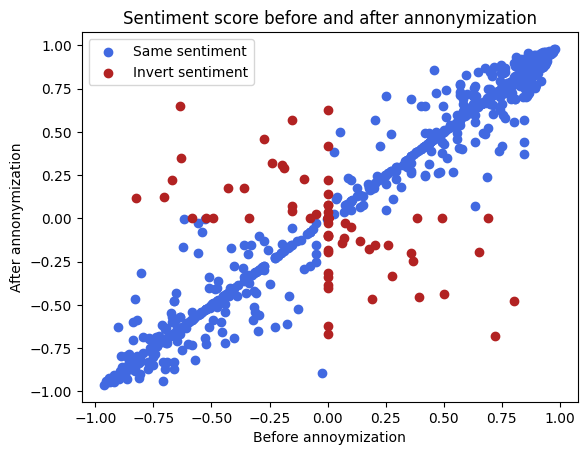

In [85]:
utilization_utils.plot_sentiment_scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])

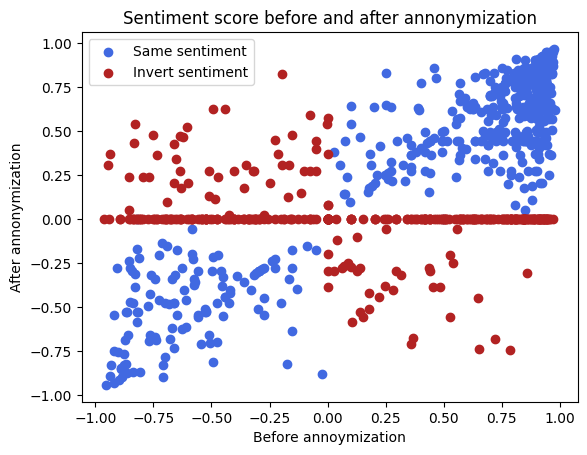

In [86]:
#plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['force_anon_txt_vader_sentiment_pred'])
utilization_utils.plot_sentiment_scatter(df_21['txt_vader_sentiment_pred'], df_21['force_anon_txt_vader_sentiment_pred'])


### Using Naive Bayes

In [ ]:
utilization_utils.sentiment_test(df_2, 'txt')

0.8858246688505911

In [ ]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

0.8667835778379148

The fully anonymized text gets he highest accuracy score!

In [ ]:
utilization_utils.sentiment_test(df_2, 'force_anon_txt')

0.7736433556473437

### Using XGBoost

In [ ]:
utilization_utils.sentiment_test(df_2, 'txt')

0.8858246688505911

In [ ]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

0.8667835778379148

In [ ]:
utilization_utils.sentiment_test(df_2, 'force_anon_txt')

0.7736433556473437

## Saving output

In [92]:
filename = 'outputs/' + output_name
df_2.to_csv(filename, index=False)

### Temp and tries

In [ ]:
print(nlp_utils.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
len(nlp_utils.stopwords.words('english'))

179

In [ ]:
len(nlp_utils.stopword_list)

179

In [ ]:
nlp_utils.add_word_list_to_stop_words('data/1000_most_common_words.txt')
len(nlp_utils.stopword_list)

1075